# Homework II - Report

Cecília Correia, 106827
<br>Patrícia Gameiro, 107245

## Programming and critical analysis [7v]

**Consider the heart-disease.csv dataset available at the course webpage’s homework tab.
Using `sklearn`, apply a 5-fold stratified cross-validation with shuffling (`random_state=0`) for the
assessment of predictive models along this section.**

### 1) 
**Compare the performance of a 𝑘𝑁𝑁 with 𝑘 = 5 and a naïve Bayes with Gaussian assumption (consider all remaining parameters as default):**

a. [1.0v] **Plot two boxplots with the fold accuracies for each classifier. Is there one more stable than the other regarding performance? Why do you think that is the case? Explain.**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [12]:
df = pd.read_csv('./data/heart-disease.csv')

X = df.drop("target", axis = 1)
y = df["target"]

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

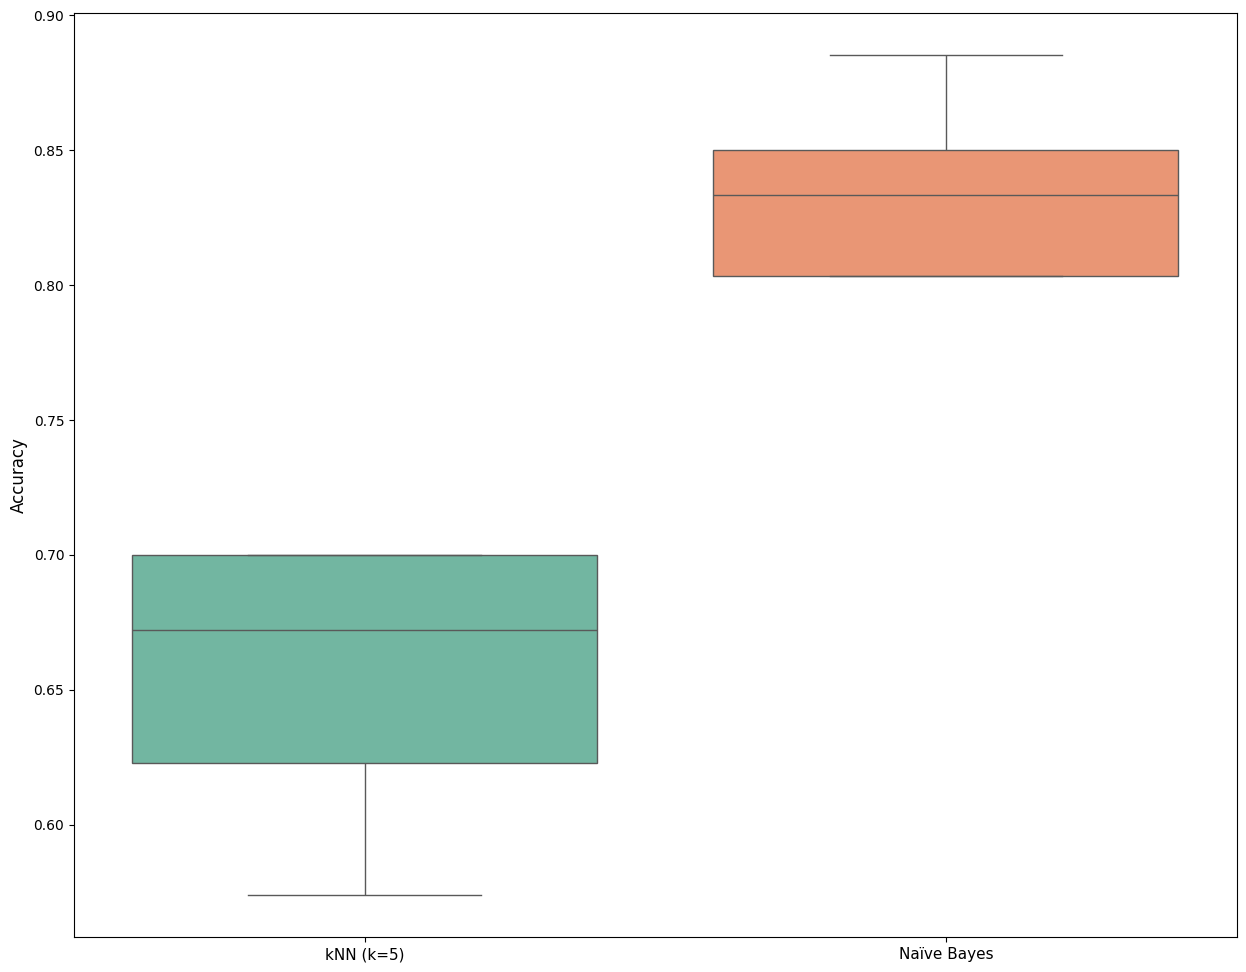

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
naive_bayes_classifier = GaussianNB()

knn_scores = cross_val_score(knn_classifier, X, y.tolist(), cv = skf, scoring='accuracy')
naive_bayes_scores = cross_val_score(naive_bayes_classifier, X, y.tolist(), cv = skf, scoring = 'accuracy')

plt.figure(figsize = (15, 12))

sns.boxplot(data = [knn_scores, naive_bayes_scores], palette = "Set2")
plt.xticks([0, 1], ["kNN (k=5)", "Naïve Bayes"], fontsize = 11)
plt.ylabel("Accuracy", fontsize = 12)

# title: Accuracy Comparison between kNN (k=5) and Naive Bayes

plt.show()

Explanation here!!! \
. \
. \
. \
. \
.

b. [1.0v] **Report the accuracy of both models, this time scaling the data with a Min-Max scaler before training the models. Explain the impact that this preprocessing step has on the performance of each model, providing an explanation for the results.**

In [14]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled_minmax = min_max_scaler.fit_transform(X)

knn_scores_minmax = cross_val_score(knn_classifier, X_scaled_minmax, y, cv = skf, scoring = "accuracy")
gnb_scores_minmax = cross_val_score(naive_bayes_classifier, X_scaled_minmax, y, cv = skf, scoring = "accuracy")

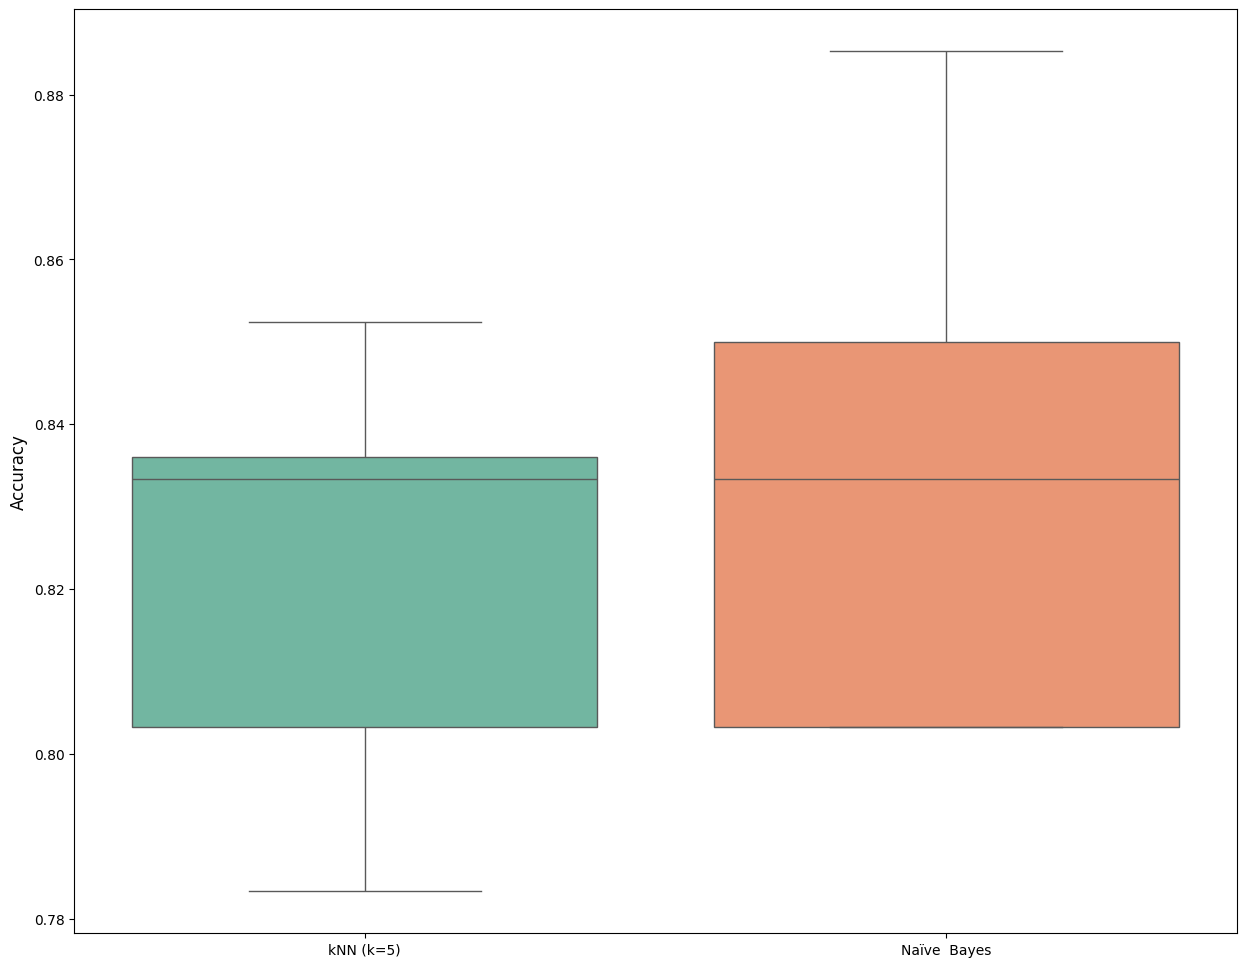

In [15]:
plt.figure(figsize = (15, 12))

sns.boxplot(data = [knn_scores_minmax, gnb_scores_minmax], palette = "Set2")
plt.xticks([0, 1], ["kNN (k=5)", "Naïve  Bayes"])
plt.ylabel("Accuracy", fontsize = 12)

# tile: "Comparison of kNN and Naive Bayes Accuracy (Min-Max Scaling) Across 5 Folds"

plt.show()

Explanation here!!! \
. \
. \
. \
. \
.

c. [1.0v] **Using `scipy`, test the hypothesis “the 𝑘𝑁𝑁 model is statistically superior to Naïve Bayes regarding accuracy”, asserting whether it is true.**

In [16]:
res = stats.ttest_rel(knn_scores , naive_bayes_scores , alternative="greater")
print("knn > naive_bayes? pval=", res.pvalue)

knn > naive_bayes? pval= 0.9987020187220139


We will conduct a one-tailed test using the accuracy scores obtained from our previous analysis. We are considering the following hypotheses:

$𝐻_{0}$ : $accuracy_{𝑘NN}$ = $accuracy_{Naive Bayes}$ \
$𝐻_{1}$ : $accuracy_{𝑘NN}$ > $accuracy_{Naive Bayes}$ 

Using scipy, we calculated a p-value of ≈ 0.9987.
This high p-value indicates that we fail to reject the $𝐻_{0}$ at all conventional significance levels (1%, 5%, and 10%). Therefore, we cannot conclude that kNN is statistically superior to Naïve Bayes.

### 2) 
**Using a 80-20 train-test split, vary the number of neighbors of a 𝑘𝑁𝑁 classifier using 𝑘 = {1, 5, 10, 20, 30}. Additionally, for each 𝑘, train one classifier using uniform weights and distance weights.**

a. [1.0v] **Plot the train and test accuracy for each model.**

In [17]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [18]:
K_VALUES = [1, 5, 10, 20, 30]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
            X, y, train_size = 0.8, stratify = y, random_state = 0
        )

train_accuracies = []
test_accuracies = []

for k in K_VALUES:
    knn_uniform = KNeighborsClassifier(n_neighbors = k, weights = "uniform")
    knn_uniform.fit(X_train, y_train)

    train_pred_uniform = knn_uniform.predict(X_train)
    test_pred_uniform = knn_uniform.predict(X_test)
    
    train_acc_uniform = accuracy_score(y_train, train_pred_uniform)
    test_acc_uniform = accuracy_score(y_test, test_pred_uniform)
    
    train_accuracies.append(train_acc_uniform)
    test_accuracies.append(test_acc_uniform)

train_accuracies_dist = []
test_accuracies_dist = []

for k in K_VALUES:

    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)

    train_pred_distance = knn_distance.predict(X_train)
    test_pred_distance = knn_distance.predict(X_test)

    train_acc_distance = accuracy_score(y_train, train_pred_distance)
    test_acc_distance = accuracy_score(y_test, test_pred_distance)
    
    train_accuracies_dist.append(train_acc_distance)
    test_accuracies_dist.append(test_acc_distance)

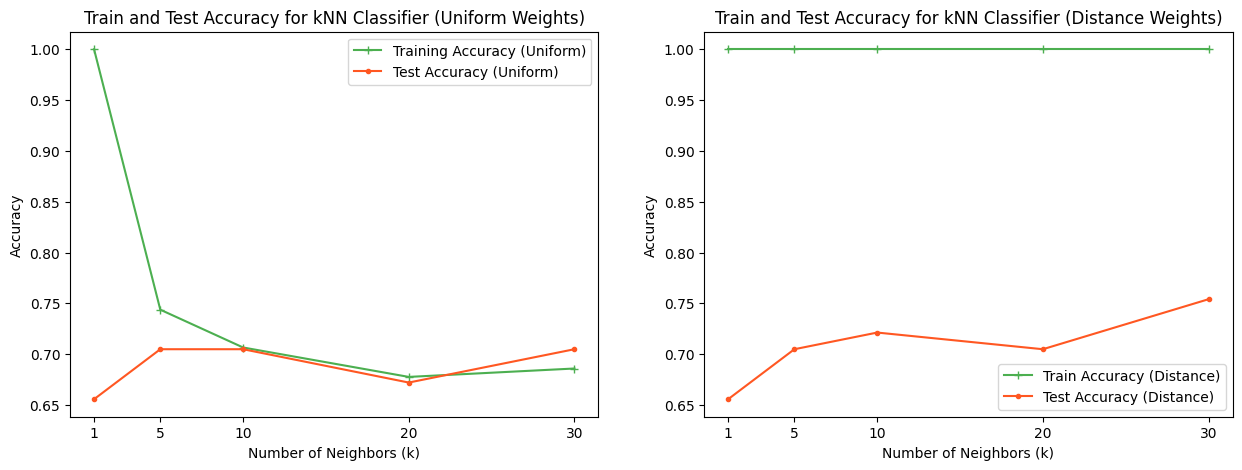

In [19]:
plt.figure(figsize = (15, 5)) 

plt.subplot(1, 2, 1)

plt.plot(
    K_VALUES,
    train_accuracies,  
    label = "Training Accuracy (Uniform)",
    marker = "+",
    color = "#4caf50",
)
plt.plot(
    K_VALUES,
    test_accuracies,
    label = "Test Accuracy (Uniform)",
    marker = ".",
    color = "#ff5722",
)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy for kNN Classifier (Uniform Weights)")
plt.xticks(K_VALUES)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(
    K_VALUES, 
    train_accuracies_dist, 
    label = "Train Accuracy (Distance)", 
    marker = "+",
    color = "#4caf50",
)
plt.plot(
    K_VALUES,
    test_accuracies_dist, 
    label = "Test Accuracy (Distance)", 
    marker = ".",
    color = "#ff5722",
)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for kNN Classifier (Distance Weights)')
plt.xticks(K_VALUES)
plt.legend()

plt.show()

b. [1.5v] **Explain the impact of increasing the neighbors on the generalization ability of the models.**

### 3) [1.5V]

**Considering the unique properties of the `heart-disease.csv` dataset, identify two possible difficulties of the Naïve Bayes model used in the previous exercises when learning from the given dataset.**

Naïve Bayes assumes that all features are conditionally independent given the class label. However, in the context of heart disease, risk factors like cholesterol levels, blood pressure, and age can be correlated. For instance, high blood pressure often correlates with high cholesterol, and both affect heart disease risk. This lack of independence can lead to suboptimal model performance, as it may not accurately capture the relationships among predictors.

The heart disease dataset includes both categorical (e.g., chest pain type) and continuous variables (e.g., age, cholesterol levels). Naïve Bayes works best with categorical data and assumes continuous features follow a Gaussian distribution. If these continuous features deviate from normality, common in medical datasets, the model's predictions may be inaccurate, leading to poor performance in classifying heart disease cases.